<a href="https://colab.research.google.com/github/evaneliz/534groupprojfiles/blob/main/FINALgroup_project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

In [4]:
url = 'https://raw.githubusercontent.com/evaneliz/534groupprojfiles/refs/heads/main/RECLEANEDsocial_explorer_census_data%20-%20RECLEANEDsocial_explorer_census_data.csv'
dftransit = pd.read_csv(url)

In [5]:
dftransit.head()

,Statistics,2080.01,2083.01,2083.02,2084.01,2085.02,2087.1,2087.2,2088.01,2088.02,...,2098.2,2100.1,2111.23,2111.24,2122.02,2122.03,2122.04,2134.01,2134.02,TOTAL
0,total_pop,"2,452","1,904","4,881","4,092","4,208","4,757","3,917","3,397","2,792",...,"2,559","3,349","1,748","4,321","3,417","2,733","3,431","4,818","4,697","115,435"
1,pop_density,"11,025.90","53,050.80","28,733.20","46,144.30","41,750.50","72,312.30","61,583.30","37,559.80","34,191.10",...,"37,004.60","21,208.90","26,316.60","28,329.40","42,863.10","66,581.70","41,683.30","63,633.70","31,045.80","40,539.50"
2,area,0.22,0.04,0.17,0.09,0.1,0.07,0.06,0.09,0.08,...,0.07,0.16,0.07,0.15,0.08,0.04,0.08,0.08,0.15,2.85
3,total_workers,"1,828",961,"2,248","2,154","2,011","2,904","2,070","1,507","1,473",...,"1,230","1,516","1,135","2,291","1,947","1,366","1,801","2,586","2,290","57,498"
4,pct_car_truck_van,59.10%,45.10%,62.50%,52.90%,56.90%,62.80%,43.60%,54.90%,59.60%,...,62.30%,45.40%,46.90%,56.70%,52.60%,51.80%,64.10%,70.30%,68.90%,52.20%


In [6]:
dftransit["Statistics"] = dftransit["Statistics"].str.replace(".", "", regex=False)

dftransit["Statistics"].astype(str)

,Statistics
0,total_pop
1,pop_density
2,area
3,total_workers
4,pct_car_truck_van
5,pct_drove_alone
6,pct_carpooled
7,pct_pubtransit
8,pct_motorcycle
9,pct_bike


In [7]:
for column in dftransit.columns:
  if "pct" in column.lower():
    dftransit[column] = dftransit[column].str.replace('%', '', regex=False).astype(float)

In [8]:
dftransit = dftransit.T

In [9]:
dftransit.rename(columns=dftransit.iloc[0], inplace=True)

In [10]:
dftransit.drop(dftransit.index[0], inplace=True)

In [11]:
dftransit = dftransit.reset_index()
  # Rename the index column to 'tract_number' so we can use it for the CRS


In [12]:
dftransit.head()

,index,total_pop,pop_density,area,total_workers,pct_car_truck_van,pct_drove_alone,pct_carpooled,pct_pubtransit,pct_motorcycle,...,pct_other,pct_wfh,pct_nonwfh,pct_less_than_ten,pct_ten_to_nineteen,pct_twenty_to_twentynine,pct_thirty_to_thirtynine,pct_forty_to_fiftynine,pct_sixty_to_eightynine,pct_ninety_or_more
0,2080.01,"2,452","11,025.90",0.22,"1,828",59.10%,41.10%,18.00%,14.60%,0.00%,...,0.00%,11.30%,88.70%,2.60%,30.40%,13.20%,22.80%,14.40%,5.30%,0.00%
1,2083.01,"1,904","53,050.80",0.04,961,45.10%,34.40%,10.60%,39.70%,0.00%,...,1.50%,6.20%,93.80%,5.00%,12.20%,13.60%,26.30%,17.50%,14.80%,4.40%
2,2083.02,"4,881","28,733.20",0.17,"2,248",62.50%,52.60%,10.00%,22.80%,0.00%,...,1.70%,8.50%,91.50%,5.30%,13.60%,12.40%,27.30%,13.50%,11.80%,7.70%
3,2084.01,"4,092","46,144.30",0.09,"2,154",52.90%,39.10%,13.80%,42.50%,0.00%,...,1.10%,2.50%,97.50%,2.40%,17.80%,14.50%,35.90%,7.50%,13.00%,6.40%
4,2085.02,"4,208","41,750.50",0.1,"2,011",56.90%,48.40%,8.50%,27.80%,0.10%,...,1.10%,3.70%,96.30%,4.50%,22.60%,13.30%,23.90%,17.90%,6.20%,7.80%


In [13]:
gdf = gpd.read_file("https://raw.githubusercontent.com/gboeing/ppd534/main/data/tl_2017_06_tract/tl_2017_06_tract.shp")
gdf.shape

(8057, 13)

In [14]:
gdf.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,001,442700,06001442700,4427,Census Tract 4427,G5020,S,1234034,0,+37.5371514,-122.0081094,"POLYGON ((-122.01721 37.53932, -122.01719 37.5..."
1,06,001,442800,06001442800,4428,Census Tract 4428,G5020,S,1278647,0,+37.5293619,-121.9931002,"POLYGON ((-122.0023 37.52984, -122.00224 37.52..."
2,06,037,204920,06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,+34.0175004,-118.1974975,"POLYGON ((-118.20284 34.01966, -118.20283 34.0..."
3,06,037,205110,06037205110,2051.10,Census Tract 2051.10,G5020,S,286962,0,+34.0245059,-118.2142985,"POLYGON ((-118.21964 34.02628, -118.21945 34.0..."
4,06,037,205120,06037205120,2051.20,Census Tract 2051.20,G5020,S,1466129,0,+34.0187546,-118.2117956,"POLYGON ((-118.22023 34.02056, -118.22018 34.0..."


In [15]:
name = ['2111.24', '2111.23' , '2134.02' , '2134.01' , '2122.04' , '2122.03' , '2122.02' , '2100.10' , '2098.20', '2098.10' , '2095.20' , '2095.10' , '2094.03' , '2094.02' , '2094.01' , '2093' , '2092.01' , '2092.02' , '2091.06' , '2091.05' , '2091.04' , '2091.03' , '2089.04' , '2089.03' , '2089.02' , '2088.02' , '2088.01' , '2087.20' , '2087.10' , '2085.02' , '2084.01' , '2083.02' , '2083.01' , '2080.01']
gdf_tracts = gdf[gdf["NAME"].isin(name)]
gdf_tracts.shape

(27, 13)

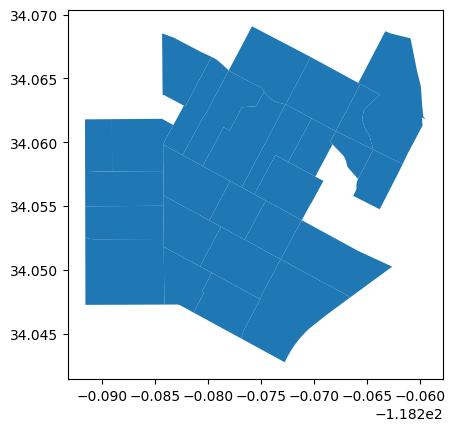

In [16]:
ax = gdf_tracts.plot()

In [17]:
gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

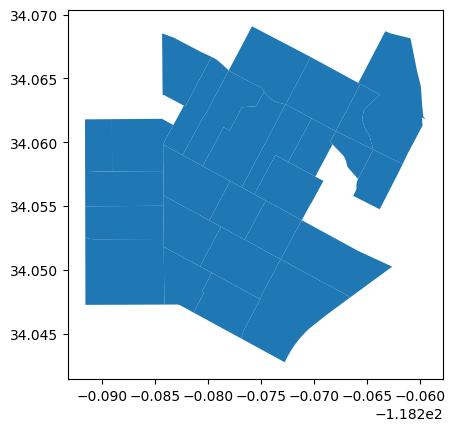

In [18]:
merged_gdf = gdf_tracts.merge(dftransit, how='left', left_on='NAME', right_on='index')

merged_gdf.plot()

In [19]:
gdf_tracts.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [20]:
merged_gdf.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,pct_other,pct_wfh,pct_nonwfh,pct_less_than_ten,pct_ten_to_nineteen,pct_twenty_to_twentynine,pct_thirty_to_thirtynine,pct_forty_to_fiftynine,pct_sixty_to_eightynine,pct_ninety_or_more
0,06,037,213401,06037213401,2134.01,Census Tract 2134.01,G5020,S,196100,0,...,0.70%,1.10%,98.90%,5.40%,11.10%,9.50%,43.70%,22.40%,3.50%,3.30%
1,06,037,213402,06037213402,2134.02,Census Tract 2134.02,G5020,S,391846,0,...,1.40%,6.30%,93.70%,1.80%,16.60%,12.00%,33.90%,19.70%,8.50%,1.20%
2,06,037,209401,06037209401,2094.01,Census Tract 2094.01,G5020,S,215664,0,...,0.00%,6.90%,93.10%,5.60%,8.80%,10.20%,33.60%,15.70%,14.40%,4.90%
3,06,037,209402,06037209402,2094.02,Census Tract 2094.02,G5020,S,136235,0,...,1.10%,7.00%,93.00%,1.80%,16.50%,11.70%,21.50%,11.20%,20.70%,9.80%
4,06,037,209810,06037209810,2098.10,Census Tract 2098.10,G5020,S,149829,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#EMILY'S CHANGES START HERE (for reference)

In [22]:
# converting columns to float, except for geometry + index
exclude_columns = ['geometry', 'index']
#converting to float & removing percentage sign
for column in merged_gdf.columns:
    if column not in exclude_columns and merged_gdf[column].dtype == 'object':
        try:
            merged_gdf[column] = merged_gdf[column].str.rstrip('%').astype(float) / 100
        except AttributeError:
            pass
        except ValueError:
            pass

In [23]:
#checking dtypes after conversion
merged_gdf.dtypes

,0
STATEFP,float64
COUNTYFP,float64
TRACTCE,float64
GEOID,float64
NAME,float64
NAMELSAD,object
MTFCC,object
FUNCSTAT,object
ALAND,int64
AWATER,int64


In [24]:
#checking that values converted successfully
merged_gdf.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,pct_other,pct_wfh,pct_nonwfh,pct_less_than_ten,pct_ten_to_nineteen,pct_twenty_to_twentynine,pct_thirty_to_thirtynine,pct_forty_to_fiftynine,pct_sixty_to_eightynine,pct_ninety_or_more
0,0.06,0.37,2134.01,60372134.01,21.3401,Census Tract 2134.01,G5020,S,196100,0,...,0.007,0.011,0.989,0.054,0.111,0.095,0.437,0.224,0.035,0.033
1,0.06,0.37,2134.02,60372134.02,21.3402,Census Tract 2134.02,G5020,S,391846,0,...,0.014,0.063,0.937,0.018,0.166,0.120,0.339,0.197,0.085,0.012
2,0.06,0.37,2094.01,60372094.01,20.9401,Census Tract 2094.01,G5020,S,215664,0,...,0.000,0.069,0.931,0.056,0.088,0.102,0.336,0.157,0.144,0.049
3,0.06,0.37,2094.02,60372094.02,20.9402,Census Tract 2094.02,G5020,S,136235,0,...,0.011,0.070,0.930,0.018,0.165,0.117,0.215,0.112,0.207,0.098
4,0.06,0.37,2098.10,60372098.10,20.9810,Census Tract 2098.10,G5020,S,149829,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#installing contextily for base map
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 80.0 MB/s eta 0:00:00


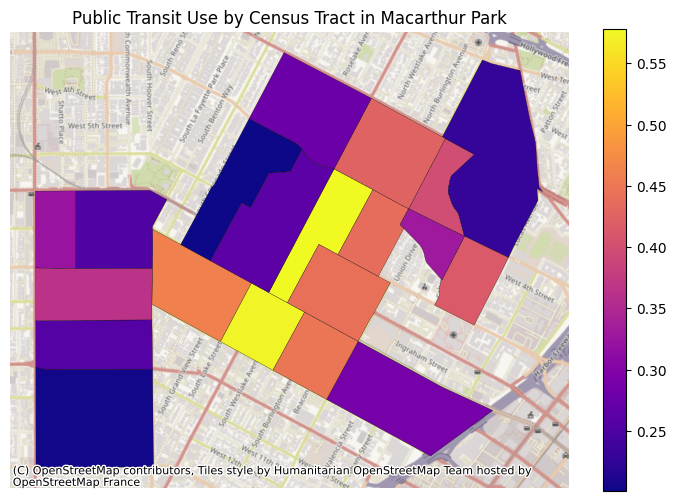

In [26]:
import contextily as ctx

ax = merged_gdf.plot(
    column="pct_pubtransit", cmap="plasma", edgecolor="k", lw=0.2, figsize=(9, 6), legend=True
)
ax.set_title('Public Transit Use by Census Tract in Macarthur Park')
ax.axis("off") #removing axis

# Adding basemap to give context to map
ctx.add_basemap(ax, crs=merged_gdf.crs.to_string())

This map shows the percentage of public transit use in Macarthur Park, a neighborhood that has heavy transit use. Looking at the map, it shows that there is a higher public transit use toward the center of the neighborhood. Referencing Google Maps, this may be due to the location of the Metro D and B Line. Easier access to transit = Higher use. The areas with a lower percentage still have access to some bus lines but are a little bit farther from the Metro rail.



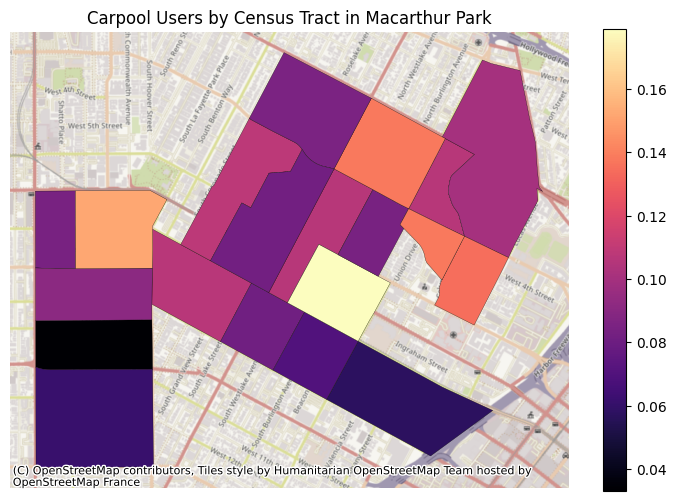

In [30]:
import contextily as ctx

ax = merged_gdf.plot(
    column="pct_carpooled", cmap="magma", edgecolor="k", lw=0.2, figsize=(9, 6), legend=True
)
ax.set_title('Carpool Users by Census Tract in Macarthur Park')
ax.axis("off") #removing axis

# Adding basemap to give context to map
ctx.add_basemap(ax, crs=merged_gdf.crs.to_string())

Above is a map that describes the percentage of carpool users in the Macarthur Park area. Based on this map you can see that the center of this area has a much more higher carpool percentage compared to the outer area. I believe this may be due to the fact that this area is one that heavily relies on public transportation. Therefore, the areas on the outer area may also have easier access to specific metro lines compared to the center area.

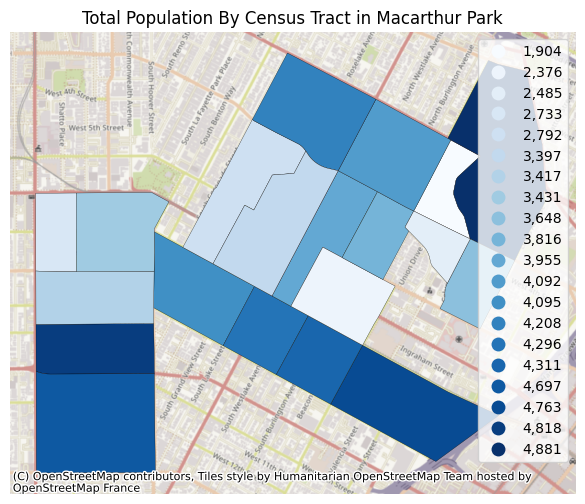

In [33]:
import contextily as ctx

ax = merged_gdf.plot(
    column="total_pop", cmap="Blues", edgecolor="k", lw=0.2, figsize=(9, 6), legend=True
)
ax.axis("off")
ax.set_title('Total Population By Census Tract in Macarthur Park')

# Adding basemap to give context to map
ctx.add_basemap(ax, crs=merged_gdf.crs.to_string())


Above is a map the shows the population of each census tract. This information gives us a clear view of which areas are the most dense. A blue gradient color to make it easy for the viewer to view the information.

Evan McAvenia: Set up Github repo, uploaded and cleaned transportation dataset and census tract shapefile.

Emily Sanchez: Created map of public transit use & explained map interpretation  

Chiarra Bettega: Created a map about the carpool usage in Macarthur Park and interpreated the map.

Joseph Trinidad: Helped with NAME filter and state census tract data. Created Total Population and interpreated the map.

